# Airline Reviews Scraping & Analysis



## Web Scraping from Skytrax

We are focusing on reviews related to **British Airways** and the airline itself. You can find the reviews at this link: [British Airways Reviews on Skytrax](https://www.airlinequality.com/airline-reviews/british-airways).  

The goal is to use **Python** and **BeautifulSoup** to scrape the website. We'll begin by collecting all the links to the individual reviews, then extract the relevant text data from each of these review pages.

This will involve:

- Extracting review URLs from the main page.
- Scraping the review text, rating, and other key information from each review.

Next steps include cleaning the data and performing analysis to uncover insights from the reviews.

In [1]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Base URL and pagination settings
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# Loop through pages and scrape reviews
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Check if the response is successful (status code 200)
    if response.status_code == 200:
        # Parse content
        content = response.content
        parsed_content = BeautifulSoup(content, 'html.parser')

        # Find and collect reviews
        for para in parsed_content.find_all("div", {"class": "text_content"}):
            reviews.append(para.get_text())

        print(f"   ---> {len(reviews)} total reviews")
    else:
        print(f"Failed to retrieve page {i}. Status code: {response.status_code}")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
# Create a DataFrame from the scraped reviews
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...


In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Save the raw reviews to a CSV file
df.to_csv("/content/drive/My Drive/Airline Review Scraping & Analysis/BA_reviews_raw.csv", index=False)

In [6]:
import pandas as pd

# Read the saved CSV file back into a DataFrame
df_raw = pd.read_csv("/content/drive/My Drive/Airline Review Scraping & Analysis/BA_reviews_raw.csv")

# Display the first few rows to verify
df_raw.head(20)

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...
5,"✅ Trip Verified | The seats were excellent, ..."
6,✅ Trip Verified | After the nightmare of get...
7,✅ Trip Verified | Prior to boarding a gate a...
8,✅ Trip Verified | I flew from Amsterdam to L...
9,"✅ Trip Verified | First the good news, the clu..."


## Data Cleaning

The objective of this step is to clean the review data by removing unwanted or irrelevant text. The reviews contain various extraneous elements such as verification tags (e.g., "✅ Trip Verified |") and other unnecessary characters (such as emojis, newlines, etc.) that do not contribute to the content analysis of the review.

The cleaning process involves the following steps:

1. **Removing Verification Tags**: Tags like "✅ Trip Verified |" and "Not Verified" are removed from the reviews. These tags indicate whether the review was verified, but they do not provide additional meaningful information for analysis.

2. **Removing Emojis and Non-ASCII Characters**: Emojis and non-ASCII characters are removed, as they do not add value to the sentiment or content of the reviews. This step ensures that the data is consistent and free of any special characters.

3. **Whitespace and Formatting Cleanup**: Extra whitespace, newlines (`\n`), carriage returns (`\r`), and tabs (`\t`) are removed to standardize the formatting of the reviews. This ensures uniformity across all review entries.

4. **Trimming Leading and Trailing Spaces**: Any leading or trailing spaces in the review text are removed, ensuring that the data is clean and properly formatted.

These steps help ensure that the review data is standardized and ready for further analysis.

In [7]:
import re
import pandas as pd

# Create a copy of raw data for cleaning
df_clean = df_raw.copy()

# Create 'verification' column based on review content
df_clean['verification'] = df_clean['reviews'].apply(
    lambda x: 'Verified' if re.search(r'✅?\s*Trip\s*Verified', x, flags=re.IGNORECASE) else
              ('Not Verified' if re.search(r'Not\s*Verified', x, flags=re.IGNORECASE) else ''))

# Clean reviews: remove verification tags, emojis, and extra whitespace
df_clean['reviews'] = df_clean['reviews'].apply(lambda x: re.sub(r"✅\s*Trip\s*Verified\s*\|?", "", x, flags=re.IGNORECASE))
df_clean['reviews'] = df_clean['reviews'].apply(lambda x: re.sub(r"Not\s*Verified\s*\|?", "", x, flags=re.IGNORECASE))
df_clean['reviews'] = df_clean['reviews'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))  # Remove non-ASCII chars
df_clean['reviews'] = df_clean['reviews'].apply(lambda x: re.sub(r'[\n\r\t]+', ' ', x))  # Remove newlines, tabs
df_clean['reviews'] = df_clean['reviews'].apply(lambda x: x.strip())

# Check the updated DataFrame
df_clean.head(20)

,reviews,verification
0,Flight mainly let down by a disagreeable fligh...,Verified
1,Another awful experience by British Airways. T...,Verified
2,"The service was rude, full of attitude to me, ...",Verified
3,This flight was a joke. There was four people ...,Verified
4,This time British Airways managed to get every...,Verified
5,"The seats were excellent, with a feel of much ...",Verified
6,After the nightmare of getting through triple ...,Verified
7,Prior to boarding a gate agent seemed to pick ...,Verified
8,I flew from Amsterdam to Las Vegas with a layo...,Verified
9,"First the good news, the club suites are such ...",Verified


## Exploratory Data Analysis

The Exploratory Data Analysis (EDA) phase begins with an initial exploration of the dataset. This step is crucial to understand the data’s structure, detect any patterns, identify missing values, and calculate basic statistics for better insights into the dataset.

### Key Tasks in EDA:
- **Summary Statistics**: Generate descriptive statistics to gain an overview of numerical columns in the dataset.
- **Verification Categories**: Analyze the distribution of the "verification" column to understand the proportion of "Verified" vs "Not Verified" reviews.
- **Missing Values**: Identify any columns with missing data to decide whether imputation or removal of such values is needed.
- **Review Length Analysis**: Evaluate the length of reviews (in terms of word count) to gain insights into the review patterns and content.

,reviews,verification
count,1000,1000
unique,1000,2
top,London to St Petersburgh. Huge disappointment ...,Verified
freq,1,743


,count
verification,
Verified,743
Not Verified,257


,Column,Missing Values
0,reviews,0
1,verification,0


,review_length
count,1000.000000
mean,154.769000
std,112.307482
min,23.000000
25%,74.000000
50%,123.000000
75%,198.000000
max,639.000000


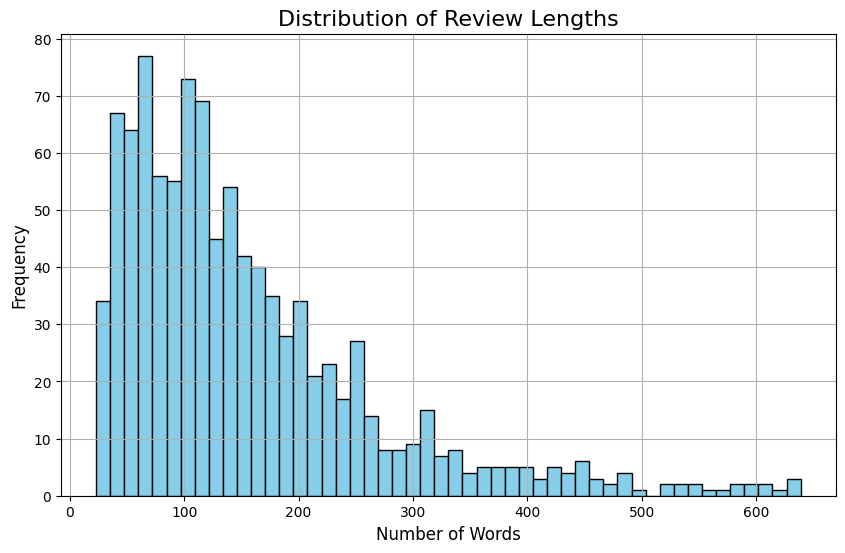

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Summary statistics for numerical columns
display(df_clean.describe())

# Distribution of 'verification' categories
display(df_clean['verification'].value_counts())

# Missing values in each column
missing_values_df = pd.DataFrame(df_clean.isnull().sum()).reset_index()
missing_values_df.columns = ['Column', 'Missing Values']
display(missing_values_df)

# Review length statistics
df_clean['review_length'] = df_clean['reviews'].apply(lambda x: len(x.split()))
display(df_clean['review_length'].describe())

# Plot the distribution of review lengths
plt.figure(figsize=(10,6))
df_clean['review_length'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths', fontsize=16)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

***Insights:***

- **_Review Count:_** The dataset contains 1,000 unique reviews, with the majority being verified (743 verified, 257 not verified).
  
- **_Data Completeness:_** There are no missing values in the review or verification columns, ensuring the dataset is complete and reliable.

- **_Review Length Distribution:_** The average review length is 155 words. Most reviews are relatively short, with 75% being under 198 words. Longer reviews are less frequent, with the longest being 639 words.

## Sentiment Analysis

In this step, sentiment analysis is performed on the reviews using the VADER Sentiment Analysis tool. VADER (Valence Aware Dictionary and sEntiment Reasoner) is specifically designed to analyze sentiment in social media texts, but it works well for general reviews as well.

The goal of sentiment analysis is to evaluate the overall sentiment of each review (positive, negative, or neutral) based on its content. VADER provides a compound score that quantifies the sentiment of the text, where:

- **Positive sentiment** is indicated by a compound score of 0.05 or greater.
- **Negative sentiment** is indicated by a compound score of -0.05 or less.
- **Neutral sentiment** falls between the scores of -0.05 and 0.05.

To carry out the sentiment analysis, the following steps are taken:

1. **Install the VADER Sentiment Library**: This step ensures that the VADER Sentiment library is available for use.
2. **Initialize the Sentiment Analyzer**: The SentimentIntensityAnalyzer class is used to analyze each review.
3. **Sentiment Analysis Function**: A custom function is created to calculate the sentiment score and categorize the review into one of the three categories (Positive, Negative, or Neutral).
4. **Apply Sentiment Analysis**: This function is applied to every review in the dataset.
5. **Storing Results**: The sentiment score and classification are stored in two new columns, `sentiment_score` and `sentiment`, in the dataset for further analysis.

This approach helps to understand the general sentiment expressed by customers and can be used for further insights or visualization.

In [9]:
# Install the vaderSentiment library if not already installed
!pip install vaderSentiment > /dev/null 2>&1

# Import necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Create a new dataframe to store sentiment analysis results
df_analysis = df_clean.copy()

# Function to analyze sentiment and return score and classification
def analyze_sentiment(review):
    # Get sentiment scores using VADER
    sentiment_score = analyzer.polarity_scores(review)
    compound_score = sentiment_score['compound']

    # Classify the review based on the compound score
    if compound_score >= 0.05:
        sentiment = 'Positive'
    elif compound_score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return compound_score, sentiment

# Apply the function to each review in the cleaned dataframe (column name is 'reviews')
df_analysis[['sentiment_score', 'sentiment']] = df_analysis['reviews'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Display the dataframe with sentiment analysis results
df_analysis.head()

,reviews,verification,review_length,sentiment_score,sentiment
0,Flight mainly let down by a disagreeable fligh...,Verified,266,-0.4852,Negative
1,Another awful experience by British Airways. T...,Verified,29,-0.8294,Negative
2,"The service was rude, full of attitude to me, ...",Verified,26,-0.4588,Negative
3,This flight was a joke. There was four people ...,Verified,46,0.0000,Neutral
4,This time British Airways managed to get every...,Verified,110,0.9831,Positive


### **Sentiment Distribution**
This visualization represents the distribution of sentiment categories (Positive, Negative, Neutral) in the dataset. A bar chart and a pie chart are used to show how reviews are classified.


           count
sentiment       
Negative     534
Positive     451
Neutral       15


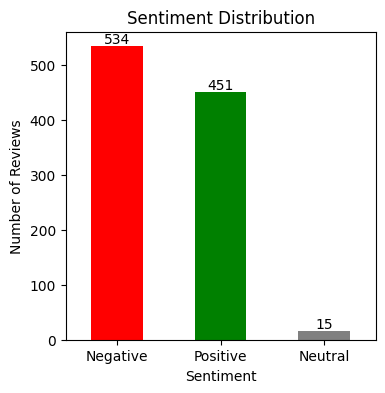

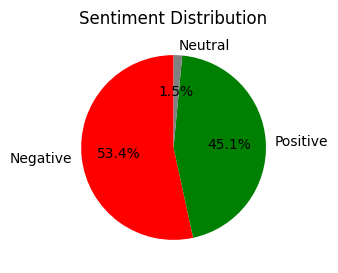

In [10]:
import matplotlib.pyplot as plt

# Sentiment count table
sentiment_counts = df_analysis['sentiment'].value_counts()
print(sentiment_counts.to_frame().rename(columns={'sentiment': 'Count'}))  # Display small table

# Bar Plot for Sentiment Distribution
plt.figure(figsize=(4, 4))
ax = sentiment_counts.plot(kind='bar', color=['red', 'green', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# Pie Chart for Sentiment Distribution
plt.figure(figsize=(4, 3))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green', 'gray'], startangle=90)
plt.title('Sentiment Distribution')
plt.ylabel('')  # Hide the y-axis label for pie chart
plt.show()

**Insights**  
The sentiment distribution indicates a generally negative sentiment in the dataset, with most reviews being negative, followed by positive ones, and only a small fraction of neutral reviews. This shows that users tend to share more critical opinions rather than neutral or positive feedback.

### **Sentiment Distribution by Verification Status**
This plot examines whether verified and unverified reviews have different sentiment trends. A stacked bar chart is used to display the breakdown.

sentiment     Negative  Neutral  Positive
verification                             
Not Verified       145        0       112
Verified           389       15       339


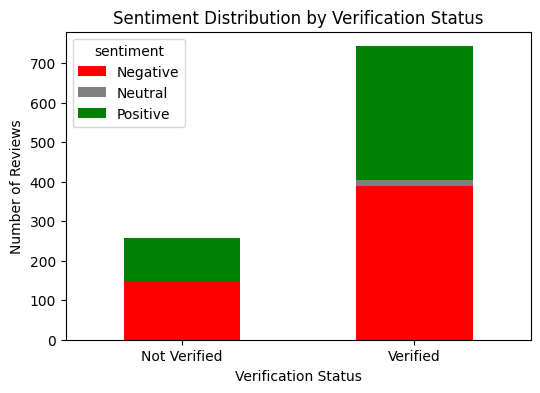

In [11]:
# Pivot table for Sentiment Distribution by Verification Status
verified_sentiment_counts = df_analysis.pivot_table(index='verification', columns='sentiment', aggfunc='size', fill_value=0)

# Display the pivot table
print(verified_sentiment_counts)

# Plot the stacked bar chart
verified_sentiment_counts.plot(kind='bar', stacked=True, figsize=(6, 4), color=['red', 'gray', 'green'])
plt.title('Sentiment Distribution by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

**Insights**
- Verified reviews have a more balanced mix of positive and negative sentiments, with a notable presence of both extremes.
- Unverified reviews lean heavily towards positive sentiment, with very few negative reviews.
- Neutral sentiments are minimal across both categories, indicating that users tend to have more polarized opinions when leaving reviews.

### **Sentiment Score Distribution**
This section visualizes the distribution of sentiment scores for the reviews. A histogram is created to display the distribution of sentiment scores, which helps to see the overall tendency of sentiments in the dataset. The x-axis will represent the sentiment score, and the y-axis will represent the frequency of those scores. A wider range of scores may indicate more variation in the sentiment of the reviews.


Sentiment Score Distribution Table:

     Bin Range  Frequency
-1.00 to -0.90        158
-0.90 to -0.80        123
-0.80 to -0.70         88
-0.70 to -0.60         37
-0.60 to -0.50         30
-0.50 to -0.40         37
-0.40 to -0.30         19
-0.30 to -0.20         17
-0.20 to -0.10         14
 -0.10 to 0.00         14
  0.00 to 0.10         14
  0.10 to 0.20         10
  0.20 to 0.30         16
  0.30 to 0.40         17
  0.40 to 0.50         21
  0.50 to 0.60         18
  0.60 to 0.70         26
  0.70 to 0.80         42
  0.80 to 0.90         68
  0.90 to 1.00        231


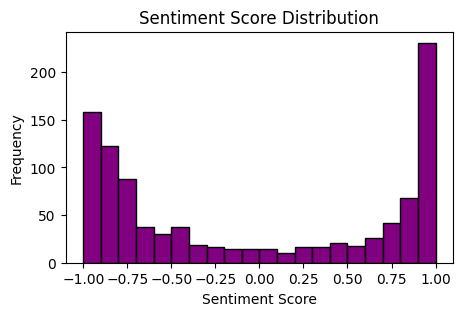

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define bin edges and labels
bins = np.linspace(-1, 1, 21)  # Creates 20 bins from -1.0 to 1.0
labels = [f"{bins[i]:.2f} to {bins[i+1]:.2f}" for i in range(len(bins)-1)]

# Compute histogram values
hist_values, _ = np.histogram(df_analysis['sentiment_score'], bins=bins)

# Create DataFrame for displaying values
hist_df = pd.DataFrame({'Bin Range': labels, 'Frequency': hist_values})

# Display table output
print("\nSentiment Score Distribution Table:\n")
print(hist_df.to_string(index=False))  # Clean output for Colab

# Plot histogram
plt.figure(figsize=(5, 3))
plt.hist(df_analysis['sentiment_score'], bins=bins, color='purple', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Insights**  
The sentiment score distribution shows that the majority of reviews have negative sentiment, with a significant concentration of scores falling in the -1.00 to -0.90 range. A smaller portion of reviews fall in the positive sentiment range, particularly between 0.90 and 1.00, highlighting that while negative sentiment is dominant, there are still a notable number of positive reviews. The distribution also indicates a sparse presence of neutral or mildly positive scores, suggesting that most reviews are clearly leaning either negative or positive, rather than being neutral.

### **Sentiment Score by Review Length**
This scatter plot analyzes the relationship between review length and sentiment score, checking if longer reviews tend to have stronger sentiments.

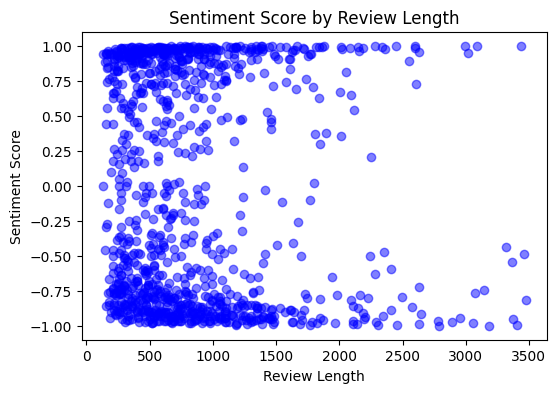

In [13]:
# Sentiment Score by Review Length (Scatter Plot)
df_analysis['review_length'] = df_analysis['reviews'].apply(len)

plt.figure(figsize=(6, 4))
plt.scatter(df_analysis['review_length'], df_analysis['sentiment_score'], color='blue', alpha=0.5)
plt.title('Sentiment Score by Review Length')
plt.xlabel('Review Length')
plt.ylabel('Sentiment Score')
plt.show()

**Insights:**
- **Short Reviews Dominate:** Shorter reviews (500-1000 characters) are more common, especially with extreme sentiment scores (-1 & 1).
- **Negative Reviews are Longer:** Longer reviews are less frequent but more likely to be negative, indicating that dissatisfied customers provide more detailed feedback.
- **Overall Negative Sentiment:** The plot highlights a higher frequency of negative feedback across all review lengths.

### **Keyword Frequency and Sentiment Distribution**  

In this step, the most frequently mentioned keywords in the customer reviews are identified and analyzed based on their sentiment. This helps in understanding the key topics discussed and how they are perceived by customers.  

#### **Process Overview**  
- **Keyword Extraction:**  
  - Reviews are tokenized into individual words.  
  - Stopwords and non-alphabetic words are removed to retain only meaningful keywords.  
  - The top 20 most frequently occurring keywords are identified.  

- **Sentiment Categorization:**  
  - Reviews are grouped into three sentiment categories: **Positive, Negative, and Neutral** (based on VADER sentiment analysis results).  
  - The occurrence of each keyword is counted separately for positive, negative, and neutral reviews.  

- **Visualization & Insights:**  
  - A **bar chart** is created to illustrate how frequently each keyword appears within each sentiment category.  
  - The color scheme represents sentiment: **Green for Positive, Red for Negative, and Gray for Neutral**.  
  - A tabular summary is provided, showing the count of each keyword across sentiment categories.  

This approach helps in identifying key discussion points in customer reviews while also assessing the sentiment associated with them, providing valuable insights into customer perceptions.  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


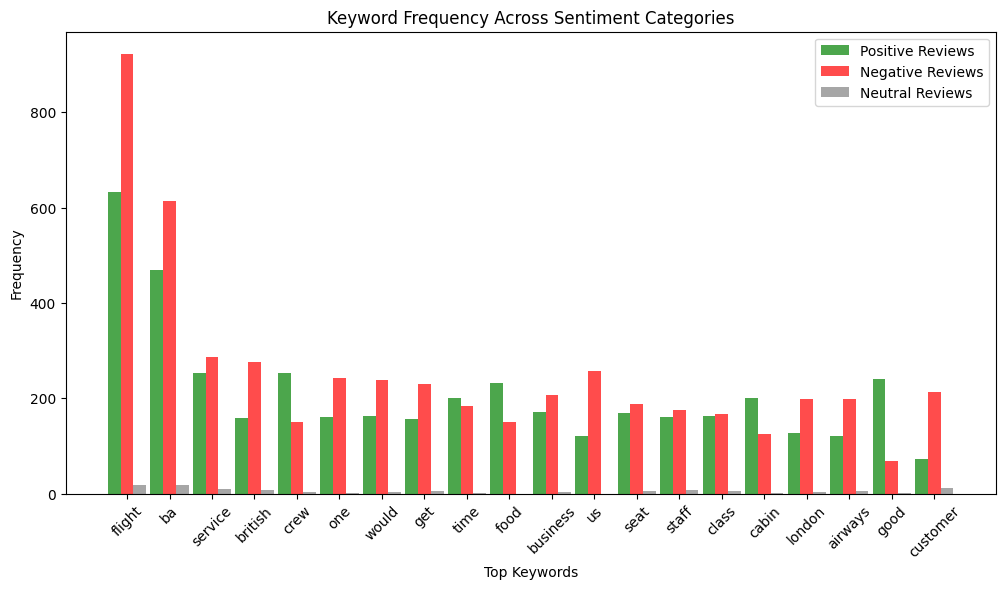

,Keyword,Positive Count,Negative Count,Neutral Count
0,flight,632,923,19
1,ba,469,615,19
2,service,254,287,9
3,british,159,276,7
4,crew,253,150,3
5,one,161,242,2
6,would,162,238,3
7,get,157,231,5
8,time,200,184,2
9,food,233,151,0


In [16]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to extract keywords from reviews
def get_keywords(text):
    words = text.lower().split()  # Convert to lowercase & split words
    words = [word for word in words if word.isalpha() and word not in stop_words]  # Remove stopwords & non-alphabetic words
    return words

# Apply keyword extraction to all reviews
df_analysis['keywords'] = df_analysis['reviews'].apply(get_keywords)

# Flatten the list of all words across all reviews
all_words = [word for words in df_analysis['keywords'] for word in words]

# Get most common words (Top 20 topics)
common_words = Counter(all_words).most_common(20)
word_labels = [word[0] for word in common_words]  # Extract just the words

# Separate Positive, Negative, and Neutral Reviews
positive_reviews = df_analysis[df_analysis['sentiment'] == 'Positive']
negative_reviews = df_analysis[df_analysis['sentiment'] == 'Negative']
neutral_reviews = df_analysis[df_analysis['sentiment'] == 'Neutral']

# Count occurrences of top keywords in each sentiment category
positive_words = [word for words in positive_reviews['keywords'] for word in words]
negative_words = [word for words in negative_reviews['keywords'] for word in words]
neutral_words = [word for words in neutral_reviews['keywords'] for word in words]

positive_count = Counter(positive_words)
negative_count = Counter(negative_words)
neutral_count = Counter(neutral_words)

# Prepare Data for Plotting
pos_counts = [positive_count[word] for word in word_labels]
neg_counts = [negative_count[word] for word in word_labels]
neu_counts = [neutral_count[word] for word in word_labels]

# Plot Word Frequency in Positive, Negative & Neutral Reviews
plt.figure(figsize=(12, 6))
bar_width = 0.3
x_indexes = range(len(word_labels))

plt.bar(x_indexes, pos_counts, color='green', alpha=0.7, width=bar_width, label='Positive Reviews')
plt.bar([x + bar_width for x in x_indexes], neg_counts, color='red', alpha=0.7, width=bar_width, label='Negative Reviews')
plt.bar([x + 2 * bar_width for x in x_indexes], neu_counts, color='gray', alpha=0.7, width=bar_width, label='Neutral Reviews')

plt.xlabel("Top Keywords")
plt.ylabel("Frequency")
plt.title("Keyword Frequency Across Sentiment Categories")
plt.xticks([x + bar_width for x in x_indexes], word_labels, rotation=45)
plt.legend()
plt.show()

# Display results as a table
keyword_sentiment_df = pd.DataFrame({
    "Keyword": word_labels,
    "Positive Count": pos_counts,
    "Negative Count": neg_counts,
    "Neutral Count": neu_counts
})

keyword_sentiment_df

**Insights:**

- **Flight**, **BA**, **service**, **crew**, **staff**, and **seat** are the most frequent keywords, showing that these topics are central to customer reviews.
- **Flight** and **BA (British Airways)** are mentioned frequently in both positive and negative contexts, suggesting that these are key aspects of customer experiences, whether good or bad.

***Positive Mentions (Green):***
- ✅ **Crew** (253 positive vs. 150 negative): The crew receives more positive feedback than negative, indicating that most passengers have a favorable view of the airline’s staff.  
- ✅ **Food** (233 positive vs. 151 negative): While the feedback is mixed, the positive mentions outweigh the negative, suggesting that many passengers were satisfied with the food.  
- ✅ **Good** (241 positive vs. 69 negative): This word stands out, reinforcing the overall positive tone in reviews.

***Negative Mentions (Red):***
- ❌ **Flight** (923 negative): The high number of negative mentions suggests that issues such as delays, cancellations, or other flight-related problems are a significant pain point for customers.  
- ❌ **Service** (287 negative): Service is a major source of dissatisfaction, with more negative mentions than positive, indicating areas for improvement in customer interaction.  
- ❌ **Customer** (213 negative): Negative comments related to customer service highlight potential complaints about how passengers are treated, which could be crucial for brand perception.

***Neutral Mentions (Gray):***
- ⚪ There are very few neutral mentions, implying that the reviews are generally polarized—either strongly positive or negative. This suggests that customers feel strongly about their experiences, with less room for indifference.